In [ ]:

pip install pandas matplotlib


In [ ]:
# @title
#imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
# @title
pd.set_option('display.max_rows', None)

In [ ]:
# @title
# query
df = pd.read_csv('/content/query_final.csv', sep=',', encoding='latin1')

df.rename(columns={'Admin User â Name': 'AdminUser_Name','City â Name': 'City_Name', 'Event Type â Name': 'EventType_Name'}, inplace=True)

---
### **Bairros**
- concentração de postes apagados por bairro

---

In [ ]:
# @title
contagem_bairros = df['Neighborhood'].value_counts()
total_ocorrencias = len(df)
porcentagens_bairros = (contagem_bairros / total_ocorrencias) * 100
print("Porcentagem de cada bairro em relação ao total de ocorrências:")
for bairro, porcentagem in porcentagens_bairros.items():
    print(f' "{bairro}": {porcentagem:.2f}%')

Porcentagem de cada bairro em relação ao total de ocorrências:
 "LeÃ§a da Palmeira": 20.44%
 "Perafita": 18.66%
 "Senhora da Hora": 16.72%
 "Matosinhos": 9.87%
 "GuifÃµes": 9.06%
 "Santa Cruz do Bispo": 7.93%
 "SÃ£o Mamede de Infesta": 5.29%
 "CustÃ³ias": 3.78%
 "Lavra": 2.80%
 "LeÃ§a do Balio": 2.70%
 "Monte Alvo": 0.65%
 "Maciel": 0.43%
 "Monte dos Pipos": 0.38%
 "Tourais": 0.32%
 "Clistio": 0.27%
 "Porto": 0.22%
 "Terra Monte": 0.22%
 "Regedoura": 0.11%
 "Norte": 0.11%
 "PadrÃ£o da LÃ©gua": 0.05%


In [ ]:
# @title
poste_por_bairro = df.groupby('Neighborhood')['ID'].count().reset_index()
poste_por_bairro = poste_por_bairro.sort_values(by='ID', ascending=True)
print ("Report por bairros")
poste_por_bairro

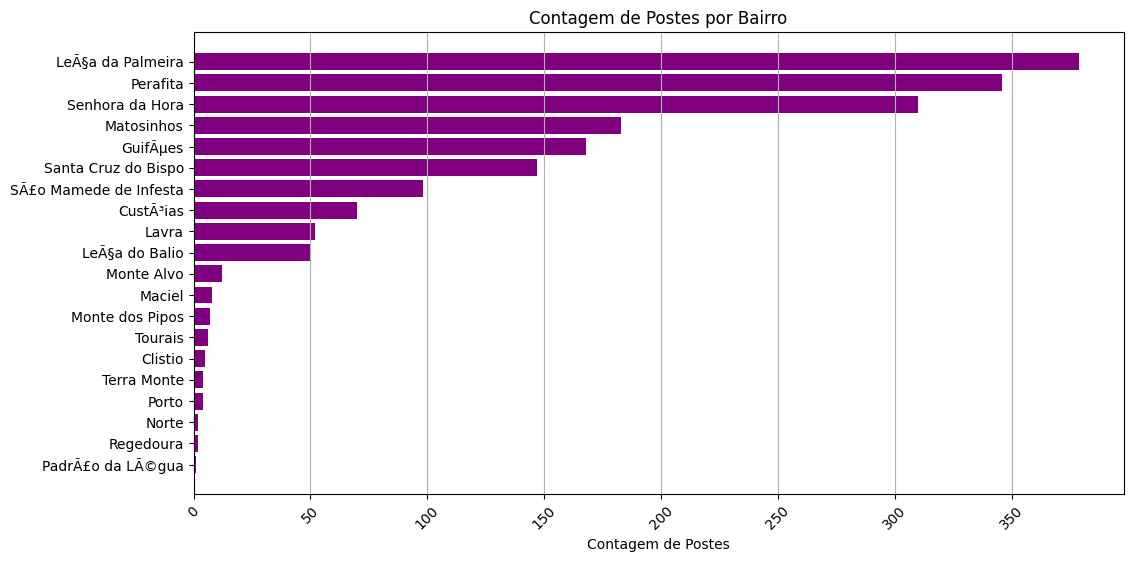

In [ ]:
# @title
# Crie um gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(poste_por_bairro['Neighborhood'], poste_por_bairro['ID'], color='purple')
plt.title('Contagem de Postes por Bairro')
plt.xlabel('Contagem de Postes')
plt.ylabel('')
plt.grid(axis='x')  # Adicione grades apenas ao longo do eixo x

# Rotacione os rótulos do eixo y para torná-los mais legíveis
plt.xticks(rotation=45)

# Mostre o gráfico de barras
plt.show()

Essas porcentagens representam a contribuição de cada bairro em relação ao total de ocorrências. Sendo assim, temos Leça da Palmeira com o maior número de reports.

---
### **Participação**
- a cada x dias y postes

---

In [ ]:
# @title
df['Created At'] = pd.to_datetime(df['Created At'])
df['YearMonth'] = df['Created At'].dt.to_period('M')
# Agrupar por mês e contar a quantidade de postes apagados em cada mês
frequencia_mensal = df.groupby('YearMonth')['ID'].count()
frequencia_mensal

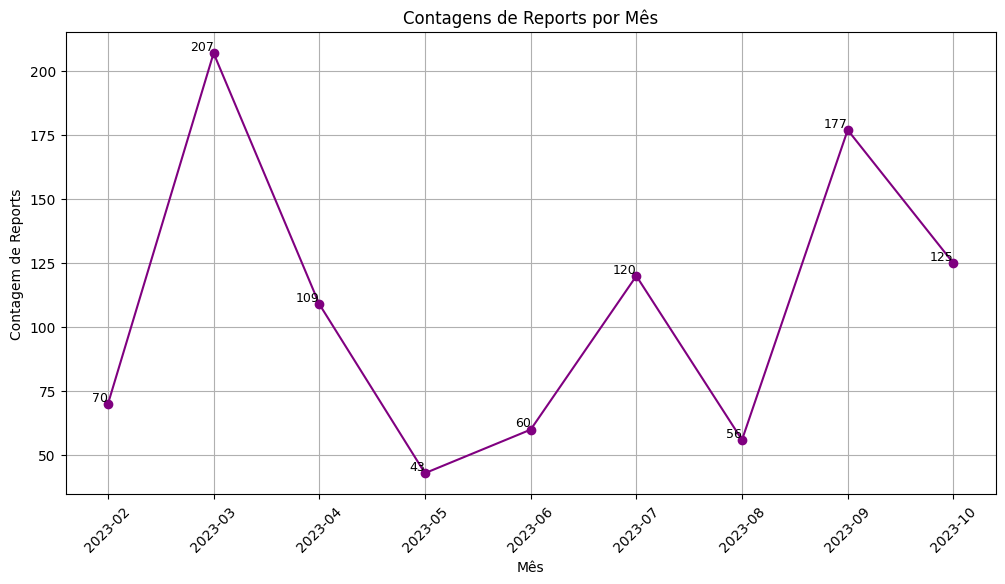

In [ ]:
# @title
# Converter as datas de período para representação de texto
meses = [str(month) for month in frequencia_mensal.index]

# Crie o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(meses, frequencia_mensal.values, marker='o', linestyle='-', color='purple')
plt.title('Contagens de Reports por Mês')
plt.xlabel('Mês')
plt.ylabel('Contagem de Reports')

# Adicione rótulos para os valores nas linhas
for x, y in zip(meses, frequencia_mensal.values):
    plt.text(x, y, str(y), ha='right', va='bottom', fontsize=9)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(True)
plt.show()

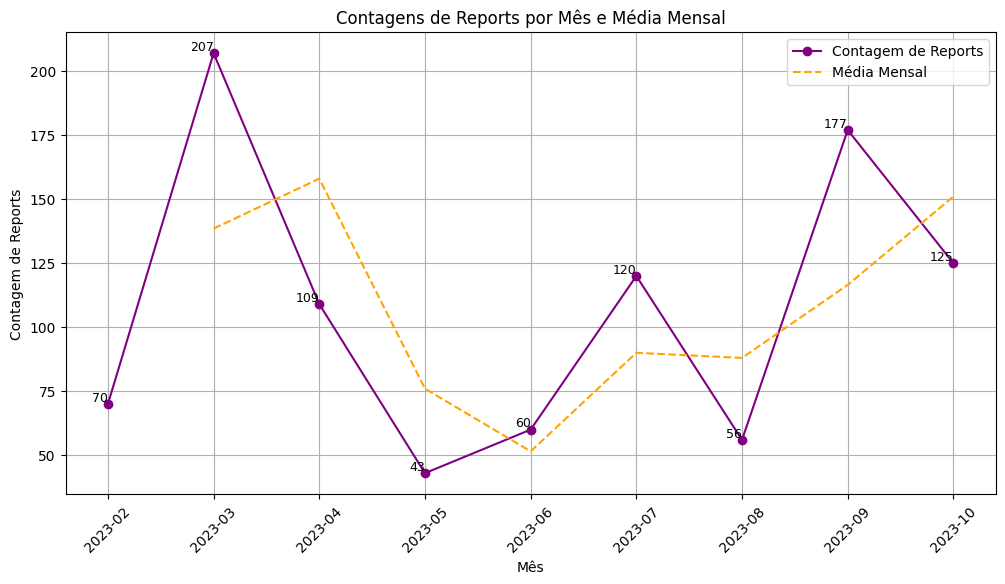

In [ ]:
# @title
media_mensal = frequencia_mensal.rolling(2).mean()  # Calcula a média móvel de 2 meses para suavizar os valores

# Crie o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(meses, frequencia_mensal.values, marker='o', linestyle='-', color='purple', label='Contagem de Reports')
plt.plot(meses, media_mensal, linestyle='--', color='orange', label='Média Mensal')  # Adicione a média ao gráfico
plt.title('Contagens de Reports por Mês e Média Mensal')
plt.xlabel('Mês')
plt.ylabel('Contagem de Reports')

# Adicione rótulos para os valores nas linhas
for x, y in zip(meses, frequencia_mensal.values):
    plt.text(x, y, str(y), ha='right', va='bottom', fontsize=9)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(True)
plt.legend()  # Adicione uma legenda ao gráfico
plt.show()


Destaque para os meses de Março, Junho, Julho e Setembro acima da média.

In [ ]:
# @title
# Criar uma nova coluna para a semana
df['Week'] = df['Created At'].dt.isocalendar().week
# Agrupar por semana e contar a quantidade de postes
frequencia_semanal = df.groupby('Week')['ID'].count()
frequencia_semanal

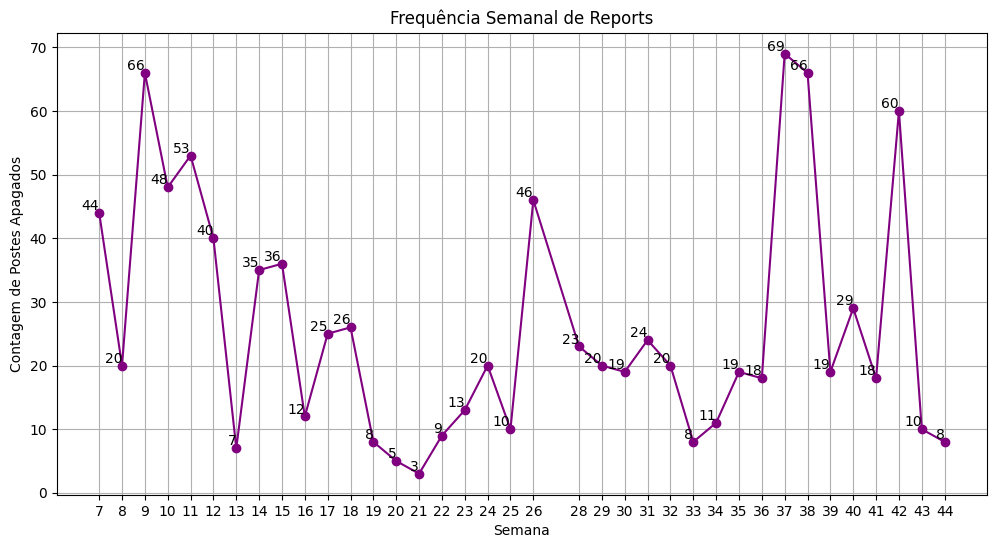

In [ ]:
# @title
# Crie o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(frequencia_semanal.index, frequencia_semanal.values, marker='o', linestyle='-', color='purple')
plt.title('Frequência Semanal de Reports')
plt.xlabel('Semana')
plt.ylabel('Contagem de Postes Apagados')

# Adicione rótulos para os valores nas linhas
for x, y in zip(frequencia_semanal.index, frequencia_semanal.values):
    plt.text(x, y, str(y), ha='right', va='bottom')

# Converta as semanas para inteiros e defina como rótulos do eixo x
plt.xticks([int(week) for week in frequencia_semanal.index])

plt.grid(True)
plt.show()

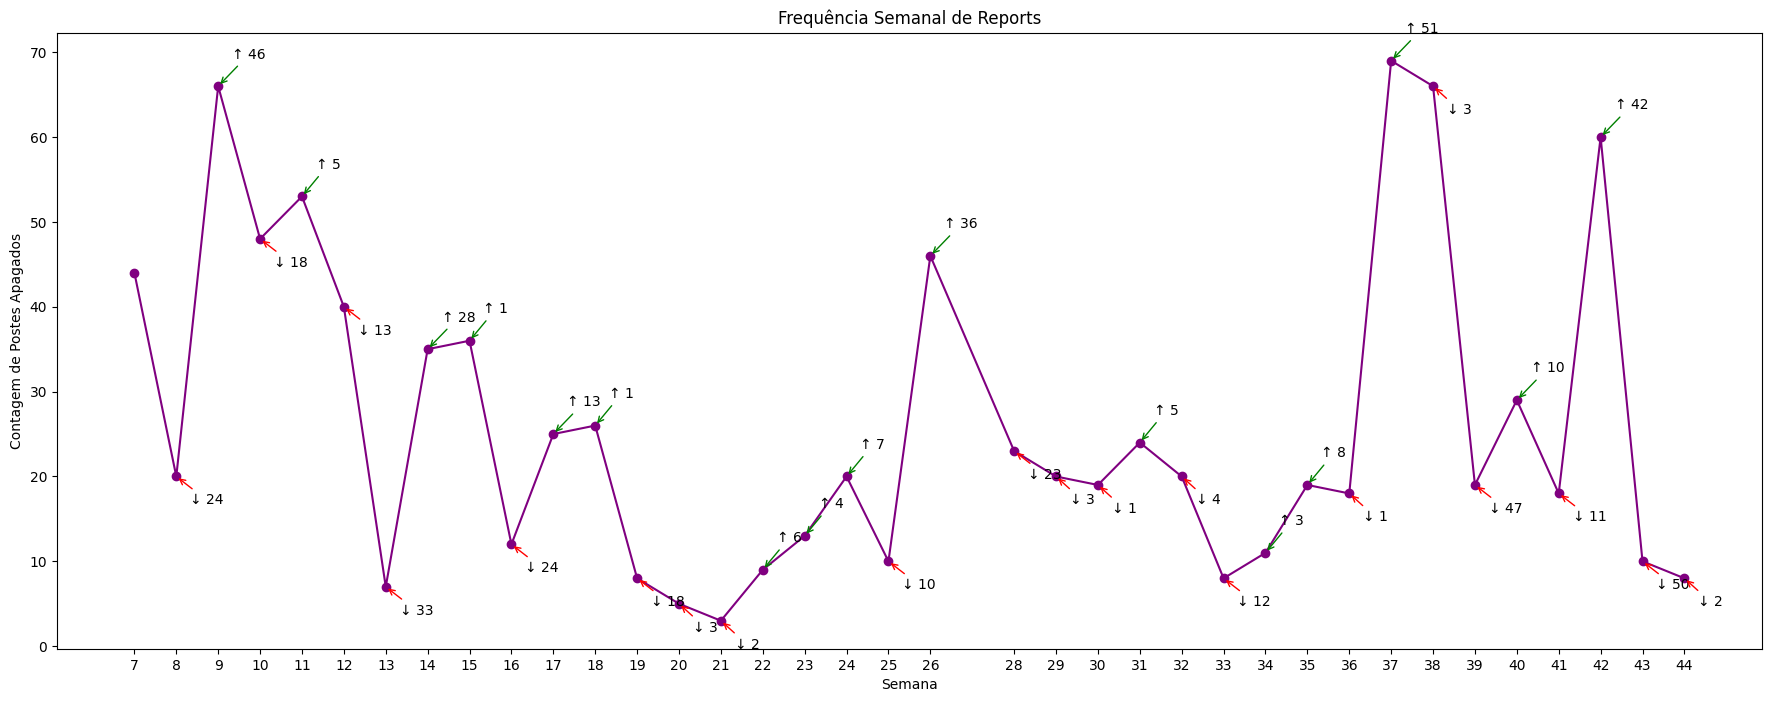

In [ ]:
# @title
# Calcule as diferenças semanais
diferencas_semanais = frequencia_semanal.diff()

# Crie o gráfico de linha
plt.figure(figsize=(22, 8))
plt.plot(frequencia_semanal.index, frequencia_semanal.values, marker='o', linestyle='-', color='purple')
plt.title('Frequência Semanal de Reports')
plt.xlabel('Semana')
plt.ylabel('Contagem de Postes Apagados')

# Adicione setas para indicar o aumento ou diminuição
for x, diff in zip(frequencia_semanal.index[1:], diferencas_semanais[1:]):
    if diff > 0:
        plt.annotate(f'↑ {int(diff)}', (x, frequencia_semanal[x]), xytext=(10, 20), textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', color='green'))
    elif diff < 0:
        plt.annotate(f'↓ {int(abs(diff))}', (x, frequencia_semanal[x]), xytext=(10, -20), textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', color='red'))

# Converta as semanas para inteiros e defina como rótulos do eixo x
plt.xticks([int(week) for week in frequencia_semanal.index])

plt.grid(False)

plt.show()

Destaque para 9º (março), 26º (junho), 37º (setembro) e 42º (outubro )semanas.

---
- tempo entre reports dos mesmos usuários
---

In [ ]:
# @title
# Converter a coluna 'Created At' em objeto de data/hora
df['Created At'] = pd.to_datetime(df['Created At'])

# Classificar o DataFrame por 'Colab User ID' e 'Created At'
df.sort_values(by=['Colab User ID', 'Created At'], inplace=True)

# Calcular a diferença de tempo entre relatórios dos mesmos usuários
df['Tempo Entre Relatórios'] = df.groupby('Colab User ID')['Created At'].diff()

# Calcular a média das diferenças de tempo para cada "Colab User ID"
tempo_medio_por_usuario = df.groupby('Colab User ID')['Tempo Entre Relatórios'].mean()

tempo_medio_por_usuario_em_dias = tempo_medio_por_usuario.dt.total_seconds() / (3600 * 24)


In [ ]:
# @title
# Defina os intervalos que você deseja considerar
intervalos = [0, 5, 7, 10, 20, 30, 40, 50, 60, 70, 80]

# Crie um dicionário para armazenar as contagens em cada intervalo
contagem_por_intervalo = {f'{inicio}-{fim} dias': 0 for inicio, fim in zip(intervalos[:-1], intervalos[1:])}

# Calcule a contagem de usuários em cada intervalo
for tempo in tempo_medio_por_usuario_em_dias:
    for inicio, fim in zip(intervalos[:-1], intervalos[1:]):
        if inicio <= tempo < fim:
            contagem_por_intervalo[f'{inicio}-{fim} dias'] += 1

# Calcule o total de usuários
total_usuarios = len(tempo_medio_por_usuario_em_dias)

# Calcule as porcentagens de usuários em cada intervalo
porcentagens = {intervalo: (contagem / total_usuarios) * 100 for intervalo, contagem in contagem_por_intervalo.items()}

print('Quantos porcentos dos usuários fazem reports entre')

# Exiba as porcentagens em texto
for intervalo, porcentagem in porcentagens.items():
   print(f'{intervalo}: {porcentagem:.2f}% dos usuários')

# Exiba o total de usuários
print(f'Total de usuários: {total_usuarios}')

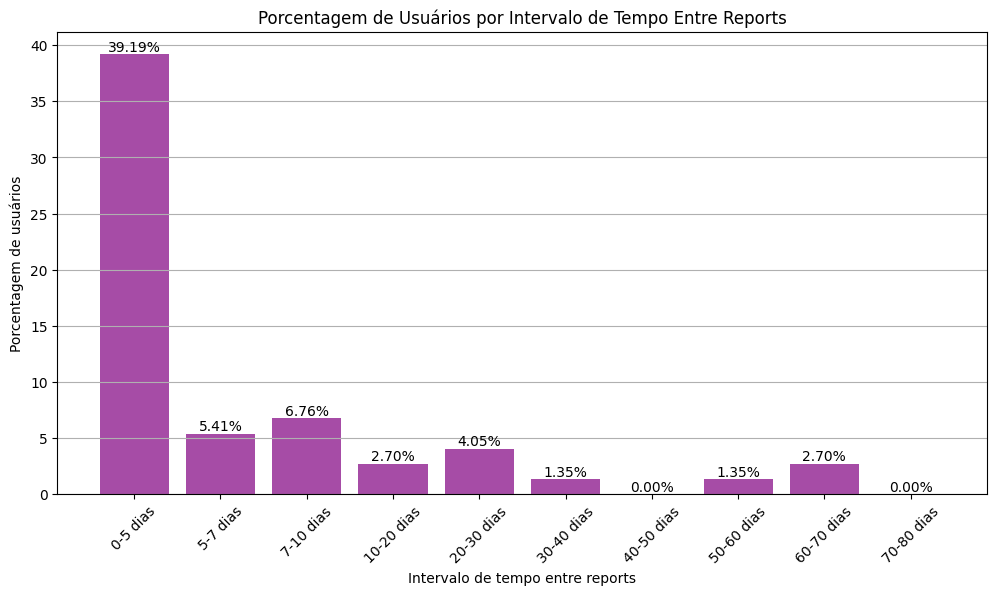

In [ ]:
# @title
intervalos_grafico = list(porcentagens.keys())
porcentagens_grafico = [porcentagens[intervalo] for intervalo in intervalos_grafico]

# Crie um gráfico de barras roxas (histograma)
plt.figure(figsize=(12, 6))
plt.bar(intervalos_grafico, porcentagens_grafico, color='purple', alpha=0.7)
plt.title('Porcentagem de Usuários por Intervalo de Tempo Entre Reports')
plt.xlabel('Intervalo de tempo entre reports')
plt.ylabel('Porcentagem de usuários')
plt.grid(axis='y')  # Apenas linhas horizontais de grade

# Adicione rótulos com as porcentagens
for i in range(len(intervalos_grafico)):
    plt.text(intervalos_grafico[i], porcentagens_grafico[i], f'{porcentagens_grafico[i]:.2f}%', ha='center', va='bottom')

# Rotacione os rótulos do eixo x para torná-los mais legíveis
plt.xticks(rotation=45)

# Mostre o gráfico
plt.show()

39,19% dos usúarios tem mais de um reports feitos em 5 dias. Mais da metade dos usúarios ativos fazem reports com intervalos de menos de 10 dias.

---
- mobilidade territorial
---

In [ ]:
# @title
import folium
from folium.plugins import HeatMap

latitude_central = df['lat'].mean()
longitude_central = df['lng'].mean()

m = folium.Map(location=[latitude_central, longitude_central], zoom_start=12)

# Adicione marcadores ao mapa para representar as localizações
for index, row in df.iterrows():
    folium.Marker([row['lat'], row['lng']], tooltip=row['Description']).add_to(m)

heat_data = [[row['lat'], row['lng']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

m.save('mapa_mobilidade_territorial.html')

NameError: ignored

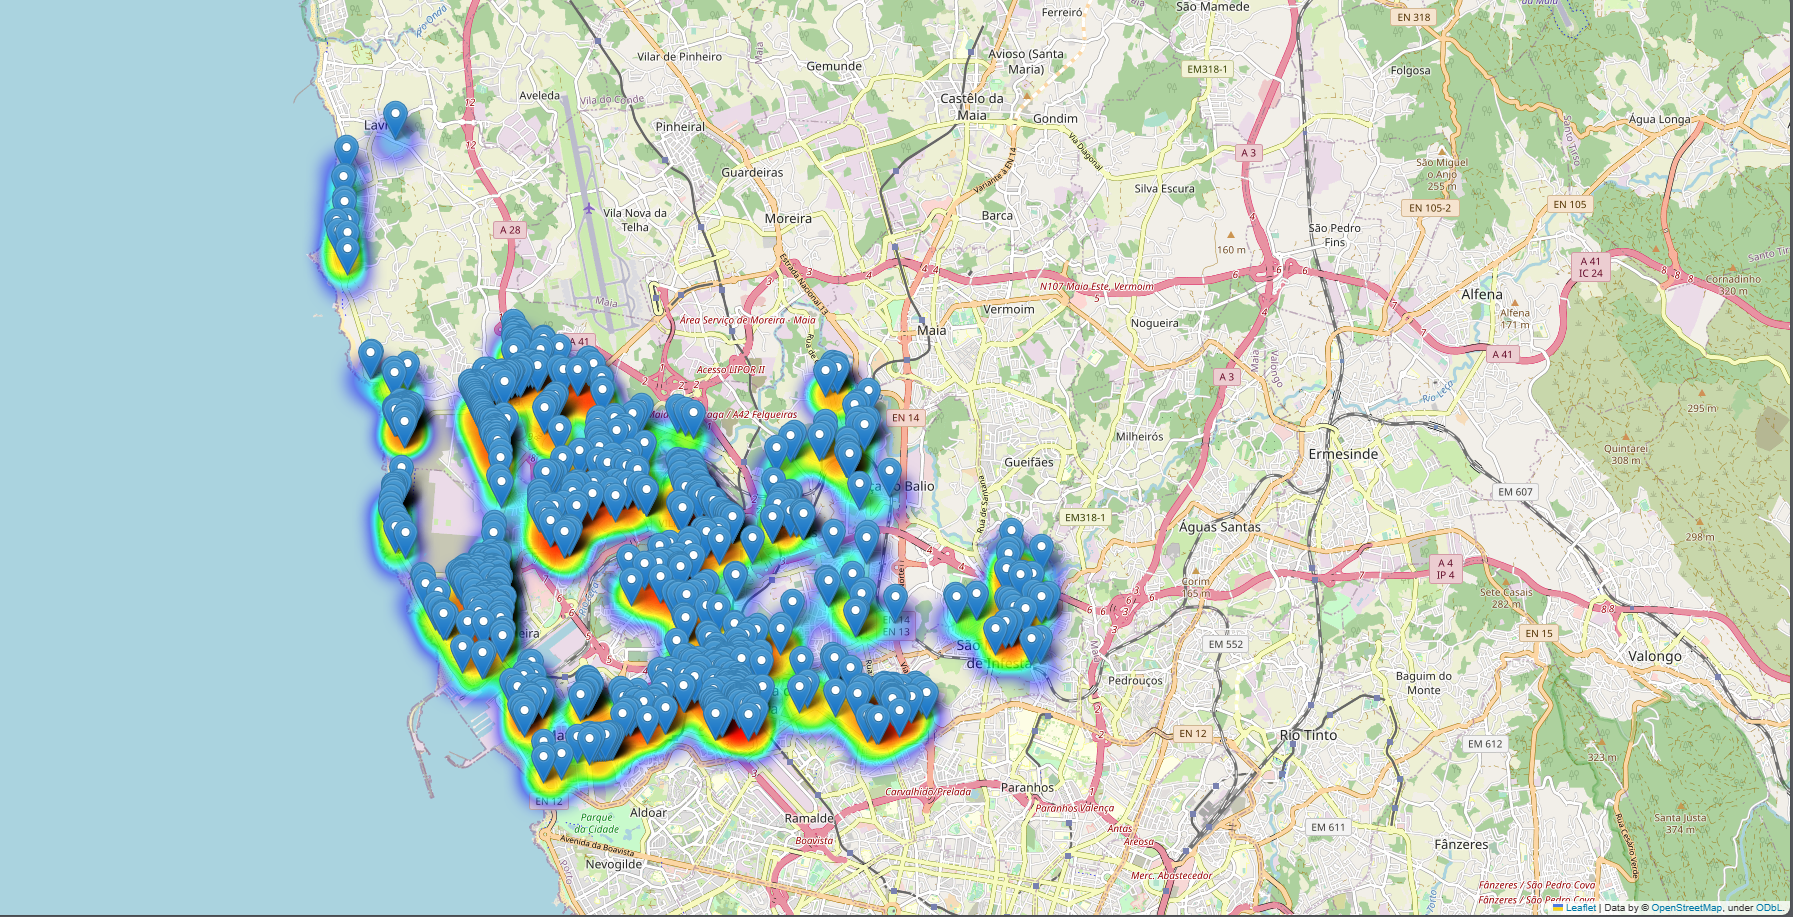

---------------------------------
- clicks em conversão
---------------------------------


In [ ]:
# @title Regressão
new_df = daily_metrics_df.copy()

# Crie a nova coluna com base na condição
new_df['Regressao'] = (new_df['Click_Post'] > 0).astype(int)
new_df = new_df[new_df['Novos Usuários'] != 0]
new_df

In [ ]:
# Variável independente (X) será a coluna "Novos Usuários"
X = new_df[['Click_Post']]

# Variável dependente (y) será a coluna "Click_Post"
y = new_df['Novos Usuários']

# Adicione uma constante para o termo de interceptação (constante)
X = sm.add_constant(X)

# Crie o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exiba o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Novos Usuários   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     69.41
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           1.83e-13
Time:                        13:03:42   Log-Likelihood:                -250.17
No. Observations:                 118   AIC:                             504.3
Df Residuals:                     116   BIC:                             509.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8351      0.543     -3.377      0.0

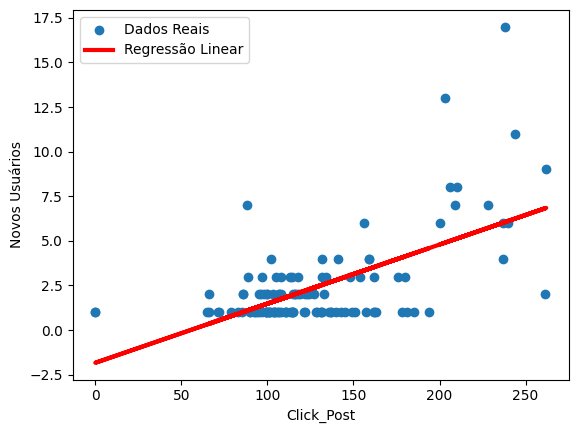

In [ ]:
# Previsões com o modelo
y_pred = model.predict(X)

# Crie o gráfico de dispersão com a linha de regressão
plt.scatter(X['Click_Post'], y, label='Dados Reais')
plt.plot(X['Click_Post'], y_pred, color='red', linewidth=3, label='Regressão Linear')
plt.xlabel('Click_Post')
plt.ylabel('Novos Usuários')
plt.legend()

# Exiba o gráfico de regressão linear
plt.show()

In [ ]:
# Variável independente (X) será a coluna "Novos Usuários"
X = new_df[['Click_Post']]

# Variável dependente (y) será a coluna "Click_Post"
y = new_df['Participações']

# Adicione uma constante para o termo de interceptação (constante)
X = sm.add_constant(X)

# Crie o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exiba o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Participações   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.06683
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.796
Time:                        13:03:43   Log-Likelihood:                -414.16
No. Observations:                 118   AIC:                             832.3
Df Residuals:                     116   BIC:                             837.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5209      2.181      2.531      0.0

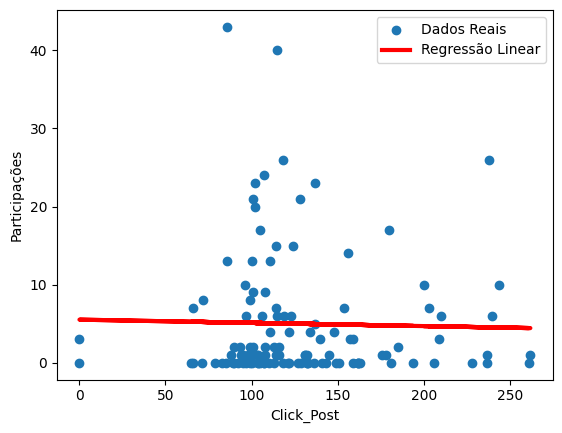

In [ ]:
# Previsões com o modelo
y_pred = model.predict(X)

# Crie o gráfico de dispersão com a linha de regressão
plt.scatter(X['Click_Post'], y, label='Dados Reais')
plt.plot(X['Click_Post'], y_pred, color='red', linewidth=3, label='Regressão Linear')
plt.xlabel('Click_Post')
plt.ylabel('Participações')
plt.legend()

# Exiba o gráfico de regressão linear
plt.show()

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = new_df.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                Novos Usuários  Participações  Click_Post  Regressao
Novos Usuários        1.000000       0.162008    0.611860   0.072906
Participações         0.162008       1.000000   -0.023996   0.056640
Click_Post            0.611860      -0.023996    1.000000   0.357852
Regressao             0.072906       0.056640    0.357852   1.000000


<ipython-input-46-f35ca59bfd78>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


In [ ]:
# @title
pip install seaborn


In [ ]:
# @title
import seaborn as sns

<ipython-input-47-833534e1c865>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


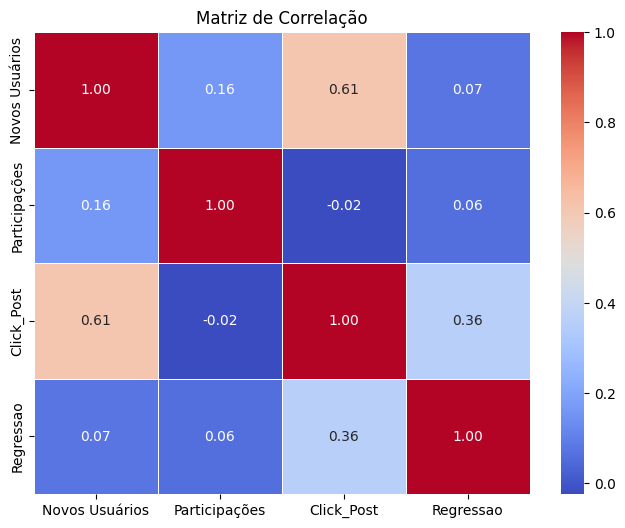

In [ ]:
# @title
# Calcular a matriz de correlação
correlation_matrix = new_df.corr()

# Criar um gráfico de matriz de correlação usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()